# Clasificación de imágenes con Redes Neuronales

## Descargamos el popular CIFAR10!

In [27]:
import torch
torch.manual_seed(123)

from torchvision import datasets

data_path = '../CIFAR10/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) 

TypeError: __init__() got an unexpected keyword argument 'train'

Tenemos muchos datasets que podemos descargar directamente desde Pytorch. Incluye reconocimiento de objetos, dígitos, plantas, cáncer, etc. Podemos ver la documentación en: 
y abajo desplegamos la lista de datasets:

In [2]:
dir(datasets) # En Pytorch tenemos para probar multitud de datasets

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'Caltech101',
 'Caltech256',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'KMNIST',
 'Kinetics',
 'Kinetics400',
 'Kitti',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'Sintel',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 'VisionDataset',
 'WIDERFace',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_optical_flow',
 'caltech',
 '

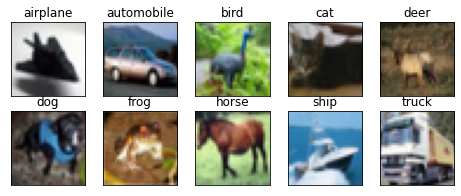

In [4]:
import matplotlib.pyplot as plt

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [7]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

Vemos que el dataset cifar10 es una subclase de *torch.utils.data.dataset.Dataset*. Pytorch usa esta clase para trabajar con datasets. Se caracteriza por tener dos métodos: *\_\_len\_\_* y *\_\_getitem\_\_*.

- *\_\_len\_\_* nos dice el tamaño del dataset.
- *\_\_getitem\_\_* nos permite indexar elementos del dataset.

In [8]:
len(cifar10)

50000

<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE5E24DAB50> 8 ship


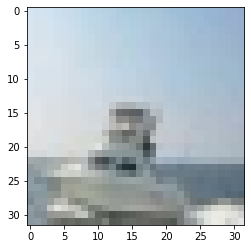

In [20]:
img, label = cifar10[100]
print(img, label, class_names[label])

plt.imshow(img)
plt.show()

Los objetos del dataset son imágenes PIL. Para poder trabajar con nuestras redes neuronales en Pytorch necesitamos convertirlas en tensores! Esto se consigue con la función *torchvision.transforms.ToTensor()*.

In [15]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [18]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                          transform=transforms.ToTensor())

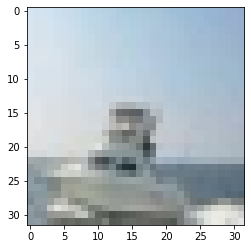

In [19]:
plt.imshow(img_t.permute(1, 2, 0))  # <1>
plt.show()

### Normalización

In [21]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [22]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [23]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [24]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [25]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


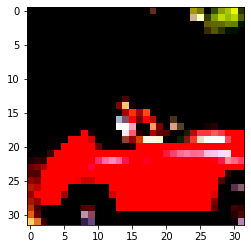

In [26]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## 